# Assignment 2: Regression Methods
**Team Members:** 
- Mukesh Thamilvanan, mthamilv
- Siqi Cheng, scheng42

### Selected Datasets
1. Wine Quality Dataset
2. Netflix Dataset


<a id='part1'></a>
## Part I: Data Analysis – Wine Quality Dataset

In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [4]:
## 1. Load the Wine Quality dataset
df_wine = pd.read_csv('datasets/winequality-red.csv')

In [5]:
## 2. Extract main statistics
print("First head rows of Wine Quality dataset:")
df_wine.head()

First head rows of Wine Quality dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
print("\nDataset Information:")
df_wine.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
print("\nDescriptive Statistics:")
df_wine.describe()


Descriptive Statistics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
print("\nShape of the dataset:")
print(df_wine.shape)  


Shape of the dataset:
(1599, 12)


In [9]:
print("\nColumn names in Wine Quality dataset:")
df_wine.columns


Column names in Wine Quality dataset:


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
## 3. Data Preprocessing
### Calculate the sum of missing entries
# No missing values in dataset
missing_values_wine = df_wine.isnull().sum(axis=0)
print("\nMissing values in Wine Quality dataset:")
print(missing_values_wine)


Missing values in Wine Quality dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [11]:
### Convert string columns to categorical (if any)
# No string columns in dataset
for col in df_wine.columns:
    if df_wine[col].dtype == 'object':
        df_wine[col] = df_wine[col].astype('category')
print("\nColumn data types after conversion:")
print(df_wine.dtypes)


Column data types after conversion:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


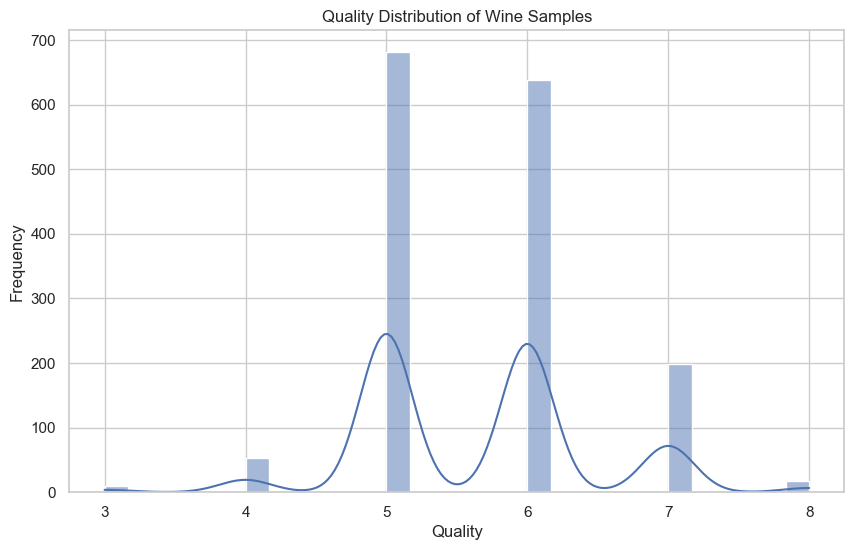

In [12]:
## 4. Data Visualization
### Quality Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_wine['quality'], kde=True)
plt.title('Quality Distribution of Wine Samples')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()


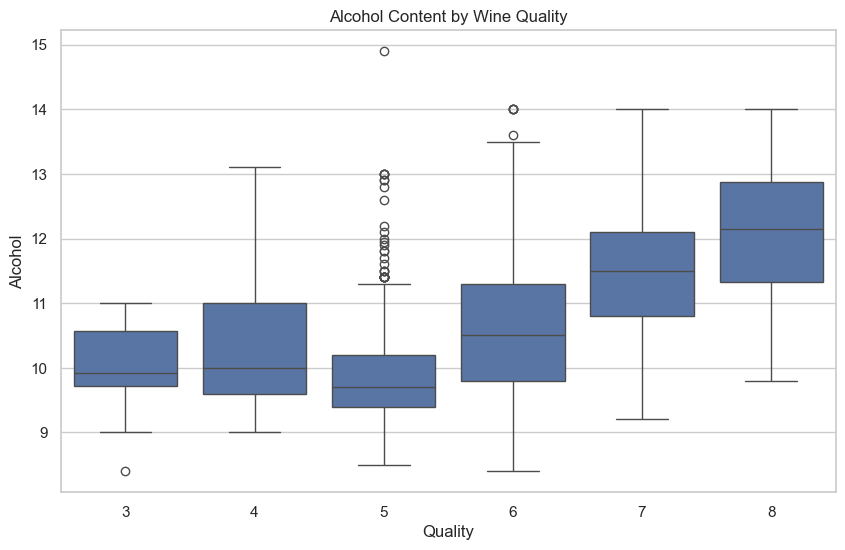

In [13]:
### Alcohol vs Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df_wine)
plt.title('Alcohol Content by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

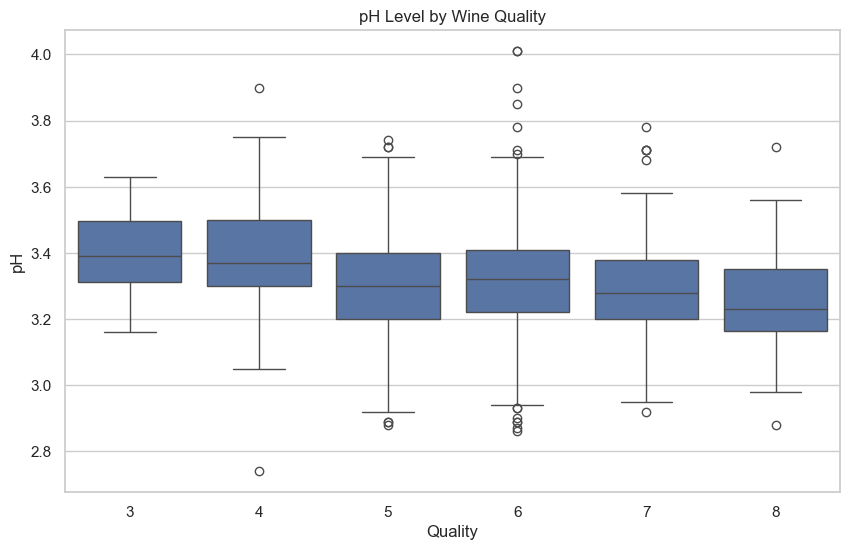

In [14]:
### pH vs Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='pH', data=df_wine)
plt.title('pH Level by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('pH')
plt.show()


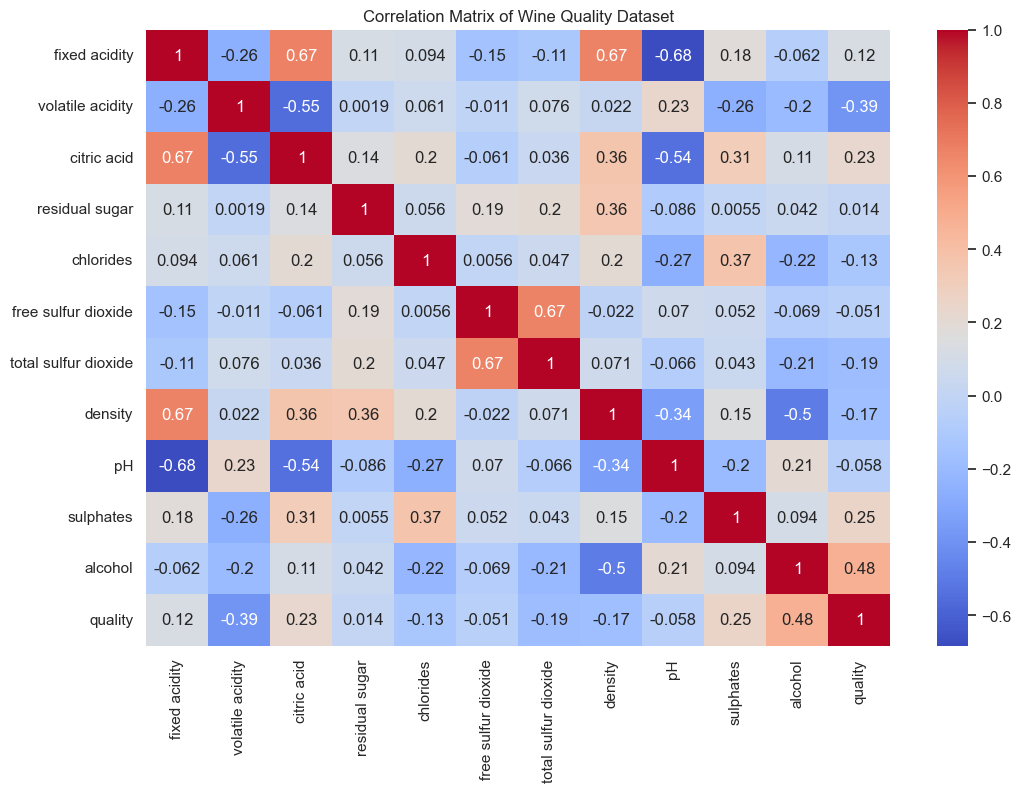

In [15]:
### Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df_wine.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Wine Quality Dataset')
plt.show()


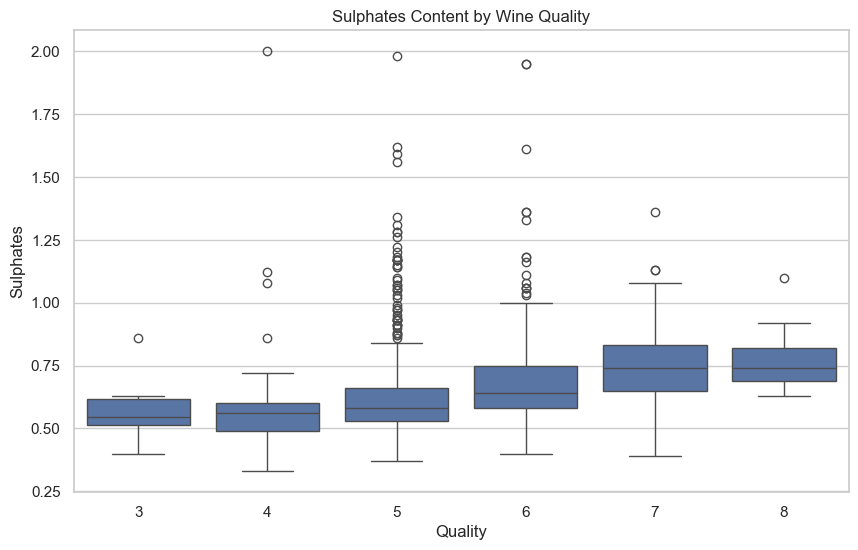

In [16]:
### Sulphates vs Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='sulphates', data=df_wine)
plt.title('Sulphates Content by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Sulphates')
plt.show()


<a id='part2'></a>
## Part I: Data Analysis – Netflix Dataset

In [17]:
## 1. Load the Netflix dataset
df_netflix = pd.read_csv('datasets/netflix_titles.csv')

In [18]:
## 2. Extract main statistics
print("First head rows of Netflix dataset:")
df_netflix.head()

First head rows of Netflix dataset:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [19]:
print("\nDataset Information:")
df_netflix.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [20]:
print("\nDescriptive Statistics:")
df_netflix.describe()


Descriptive Statistics:


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [21]:
print("\nMissing values count in each column:")
df_netflix.isnull().sum()


Missing values count in each column:


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [22]:
print("\nColumn names in Netflix Titles dataset:")
df_netflix.columns


Column names in Netflix Titles dataset:


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [23]:
## 3. Data Preprocessing
### Calculate the sum of missing entries
missing_values_titles = df_netflix.isnull().sum(axis=0)
print("\nMissing values in Netflix Title dataset:")
print(missing_values_titles)



Missing values in Netflix Title dataset:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [24]:
### Fill missing values (if any)
# Missing values present in "director", "cast", "country", "date_added", "rating", and "duration"
# Filling the Categorical values with "Unknown" and numerical with the mean of the column

df_netflix.fillna(
    {
        "director": "Unknown", 
        "cast": "Unknown",
        "country": "Unknown",
        "date_added": "Unknown",
        "rating": "Unknown",
        "duration": "Unknown",
    }, 
    inplace=True
    )


In [25]:
### Convert string columns to categorical (if any)


# Categorical conversion of type
# df_netflix["country"] = df_netflix.country.astype('category') # conversion if needed
print(df_netflix.dtypes)
# no string type present in dataframe

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


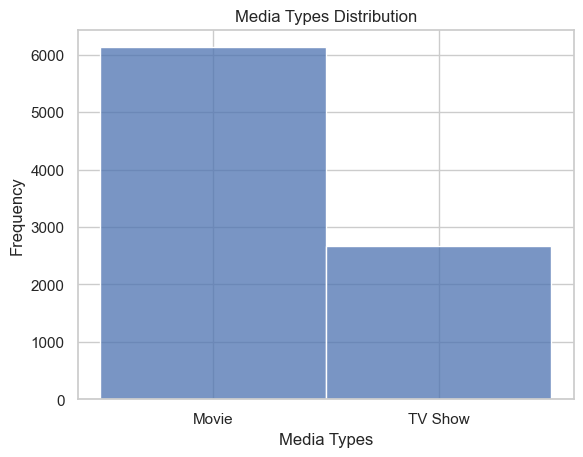

In [26]:
## 4. Data Visualization
# Type Distribution
plt.figure()
sns.histplot(df_netflix['type'])
plt.title('Media Types Distribution')
plt.xlabel('Media Types')
plt.ylabel('Frequency')
plt.show()

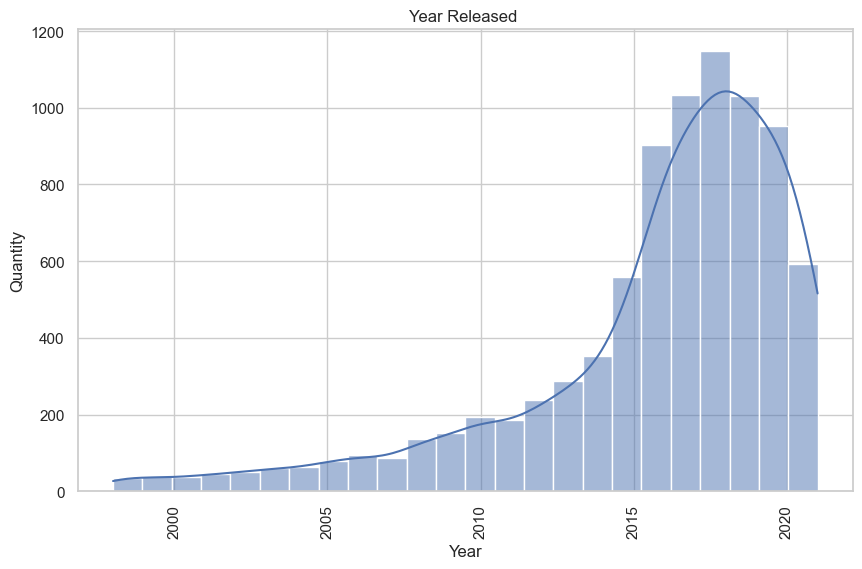

In [27]:
# Release Year Distribution

most_recent_year = df_netflix['release_year'].max()
cutoff_year = most_recent_year - 24

filtered_df = df_netflix[df_netflix['release_year'] > cutoff_year]

# Plot the filtered data
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['release_year'], bins=24, kde=True)
plt.title('Year Released ')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.show()

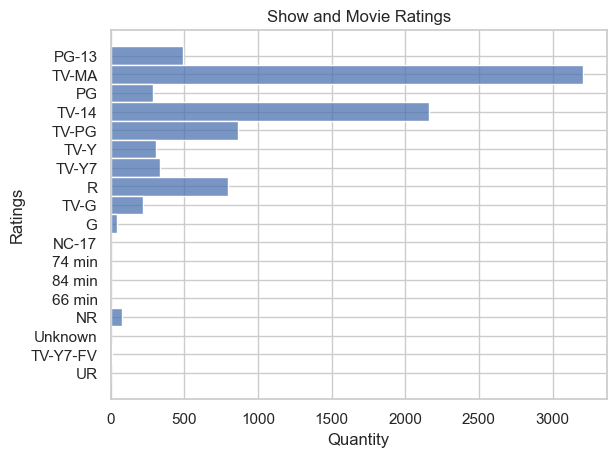

In [28]:
# Rating Distribution
plt.figure()
sns.histplot(df_netflix, y ='rating')
plt.title('Show and Movie Ratings')
plt.xlabel('Quantity')
plt.ylabel('Ratings')
plt.show()

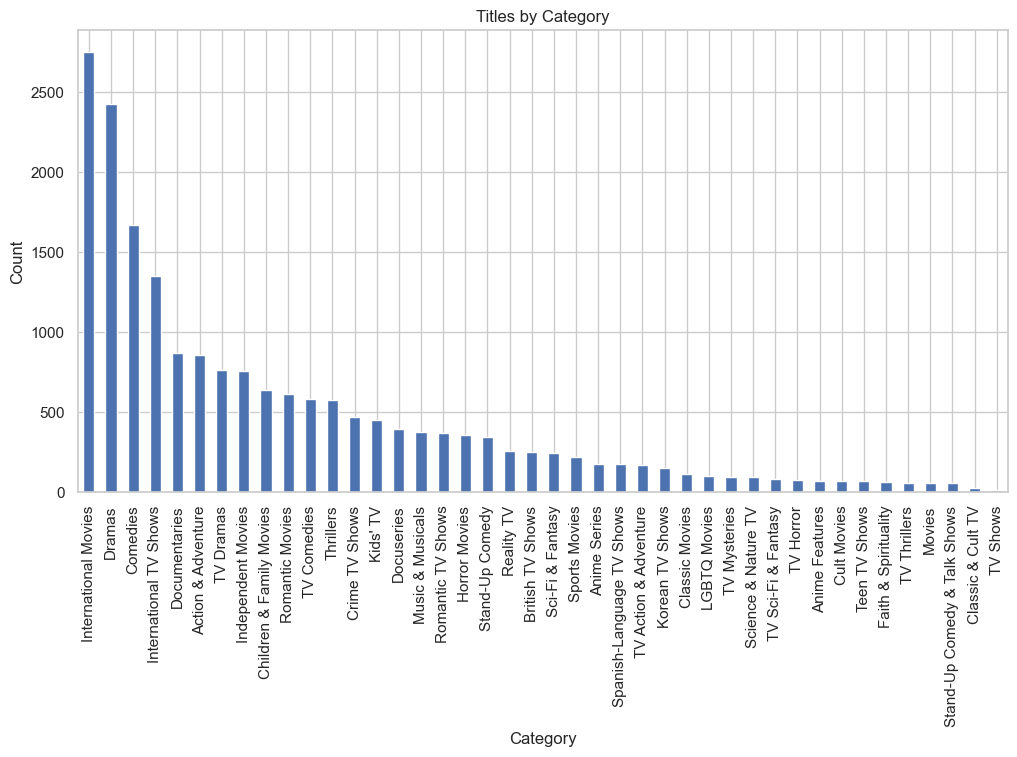

In [29]:
# Movie categorical distribution

categories = df_netflix['listed_in'].str.split(',').explode().str.strip().value_counts()

plt.figure(figsize=(12, 6))
categories.plot(kind='bar')
plt.title('Titles by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


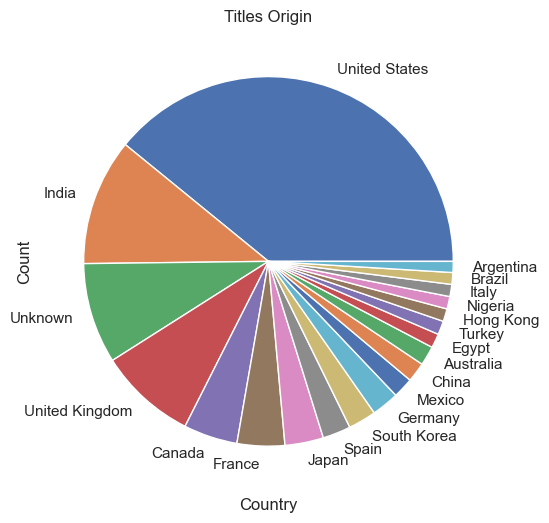

In [30]:
# Titles from the country of origin
# Count the occurrences of each country (splitting multiple countries)
country_counts = df_netflix['country'].str.split(',').explode().str.strip().value_counts().nlargest(20)

# Plot the distribution of titles by country
plt.figure(figsize=(10, 6))
country_counts.plot(kind='pie')
plt.title('Titles Origin')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()